In [1]:
import math 

import numpy as np
from numpy import asarray
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from torch.autograd import Variable

import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


In [2]:
x=np.linspace(0.1, 1.0, num=60000)
function1=lambda x:np.sin(5*x*math.pi)
function2=lambda x:(np.sin(6*math.pi*x))/(6*math.pi*x)
function3=lambda x:(np.cos(math.pi*10*x))/(10*x*math.pi)
y1=asarray([function1(e) for e in  x])
y2=asarray([function2(e) for e in  x])
y3=asarray([function3(e) for e in  x])
def get_output(type):
    if type ==1 :
        return y1;
    elif type ==2 :
        return y2;
    elif type ==3 :
        return y3;

In [3]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device='cpu'

In [4]:
def get_model(type):
    if type==1:
        return nn.Sequential(
                    nn.Linear(1, 202),
                    nn.ReLU(),
                    nn.Linear(202, 1)
            )
    elif type==2:
        return nn.Sequential(

                    nn.Linear(1, 10),
                    nn.ReLU(),
                    nn.Linear(10, 18),
                    nn.ReLU(),
                    nn.Linear(18, 15),
                    nn.ReLU(),
                    nn.Linear(15, 6),
                    nn.ReLU(),
                    nn.Linear(6, 1),
            )
    elif type==3:
        return nn.Sequential(

                    nn.Linear(1, 3),
                    nn.ReLU(),
                    nn.Linear(3, 10),
                    nn.ReLU(),
                    nn.Linear(10, 10),
                    nn.ReLU(),
                    nn.Linear(10, 10),
                    nn.ReLU(),
                    nn.Linear(10, 10),
                    nn.ReLU(),
                    nn.Linear(10, 10),
                    nn.ReLU(),
                    nn.Linear(10, 10),
                    nn.ReLU(),
                    nn.Linear(10, 1)
            )

In [5]:
for i in range(1,4,1):
    model=get_model(i)
    model_parameters = filter(lambda p: p.requires_grad, model.parameters())
    params = sum([np.prod(p.size()) for p in model_parameters])
    print(params)
# print(params1,params2,params3)

607
606
607


In [6]:
def train(inputDataLoader,model,loss_function,optimizer):
    model.train()
    min_loss=math.inf;
    loss_array=[]
    for (inputs,target) in inputDataLoader:
        output=model.forward(inputs)
        loss=loss_function(output,target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_array.append(loss.detach().cpu().numpy())
    return np.mean(loss_array)

In [7]:
def test(inputDataLoader,model,loss_function,optimizer):
    model.eval()
    output_result=[]
    loss_result=[]
    with torch.no_grad():
        for (inputs,target) in inputDataLoader:
            inputs.to(device)
            target.to(device)
            output=model.forward(inputs)
            loss=loss_function(output,target)
        

[[0.4918151, 0.44518986, 0.42352018, 0.40420765, 0.3881458, 0.37410486, 0.36133593, 0.34964815, 0.3387554, 0.32851747, 0.31858727, 0.30883533, 0.29949534, 0.29026017, 0.28110808, 0.2721794, 0.26313138, 0.2542359, 0.24529627, 0.23658197, 0.22770323, 0.21905962, 0.21044327, 0.20199528, 0.19357516, 0.1853826, 0.17748015, 0.16951184, 0.16188438, 0.15446869, 0.1473081, 0.14039126, 0.13370453, 0.12732196, 0.121068604, 0.11516089, 0.10942807, 0.104019955, 0.09880456, 0.09391044, 0.089167744, 0.08476116, 0.080512315, 0.07656957, 0.07279648, 0.069365956, 0.06601863, 0.06293518, 0.059999064, 0.057205454], [0.52864707, 0.49377963, 0.48657548, 0.4761746, 0.45518562, 0.416344, 0.35430366, 0.28857702, 0.23643315, 0.17818245, 0.112473324, 0.059185546, 0.03127602, 0.021844704, 0.018810483, 0.017077435, 0.01555071, 0.014028643, 0.012419033, 0.0105398595, 0.00832522, 0.006240722, 0.0043919194, 0.0025203924, 0.0014050503, 0.0007869801, 0.00044704915, 0.00026396613, 0.00017466134, 0.00012657089, 0.0001051

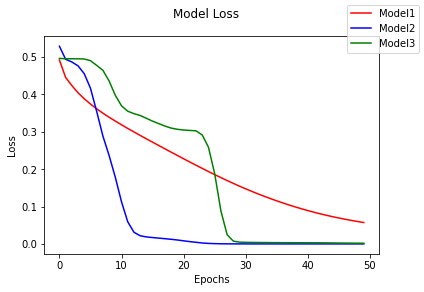

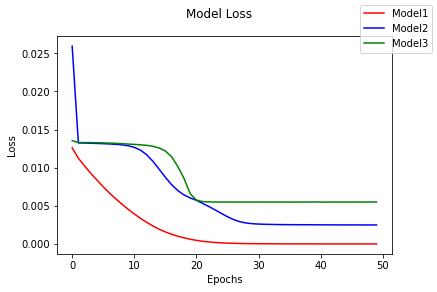

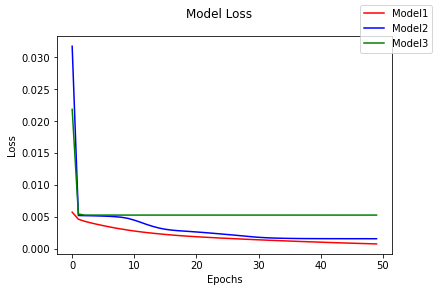

In [13]:
for functions in range(1,4,1):
    model_loss=[]
    model_pred=[]
    x_tensor = torch.FloatTensor(x).unsqueeze(1).to(device)
    for model_number in range(1,4,1):
        losses_model=[]
        X_train, X_test, y_train, y_test = train_test_split(x,get_output(functions), test_size = 0.2, random_state = 42)
        X_train=torch.FloatTensor(X_train).unsqueeze(1).to(device)
        X_test=torch.FloatTensor(X_test).unsqueeze(1).to(device)
        y_train=torch.FloatTensor(y_train).unsqueeze(1).to(device)
        y_test=torch.FloatTensor(y_test).unsqueeze(1).to(device)
        train_data = torch.utils.data.TensorDataset(X_train,y_train)
        test_data = torch.utils.data.TensorDataset(X_test,y_test)
        train_loader = torch.utils.data.DataLoader(train_data, batch_size = 64, shuffle = True)
        test_loader = torch.utils.data.DataLoader(test_data, batch_size = 64, shuffle = True)
        epochs=50
        criterion=nn.MSELoss()
        model=get_model(model_number)
        model.to(device)
        optimizer=optim.Adam(model.parameters(),lr=0.0001, weight_decay=1e-5)
        epoch_range=[*range(0,epochs,1)]
        for epoch in range(0,epochs,1):
            losses_model.append(train(train_loader,model,criterion,optimizer))
            test(test_loader,model,criterion,optimizer)
        model_loss.append(losses_model)
        input = Variable(x_tensor).to(device).requires_grad_()
        pred  = model(input).to('cpu').detach().numpy()
        model_pred.append(pred)
    print(model_loss)
#     fig=plt.figure(functions)
#     ax1=fig.add_subplot()
#     xlabel="Input Number"
#     ylabel="Output of Function"
#     label_list=["Ground Truth","Model1","Model2","Model3"]
#     c=["red","blue","green","yellow"]
#     ax1.set_xlabel(xlabel)
#     ax1.set_ylabel(ylabel)
#     for a in range(0,4,1):
#         if(a==0):
#             ax1.plot(x_tensor,get_output(functions),label=label_list[a],color=c[3])
#         else:
#             ax1.plot(x_tensor,model_pred[a-1],label=label_list[a],color=c[a-1])
#     fig.legend()
#     fig.show()
#     fig.savefig(f"{functions}-predict.png")
    fig1=plt.figure(functions)
    ax2=fig1.add_subplot()
    xlabel="Epochs"
    ylabel="Loss"
    fig1.suptitle("Model Loss")
    label_list=["Ground Truth","Model1","Model2","Model3"]
    c=["red","blue","green","black"]
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel(ylabel)
    for a in range(0,3,1):
        ax2.plot(epoch_range,model_loss[a],label=label_list[a+1],color=c[a])
    fig1.legend()
    fig1.show()
    fig1.savefig(f"{functions}-loss.png")